# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Airbnb data
df = pd.read_csv('cleaned_airbnb_data.csv')

# Display the first few rows to confirm loading
display(df.head())

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250612050748,2025-06-26,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250612050748,2025-06-27,previous scrape,Apartamentos Dana Sol,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.94
2,30959,https://www.airbnb.com/rooms/30959,20250612050748,2025-06-27,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250612050748,2025-06-26,previous scrape,Apartasol Apartamentos Dana,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,130907,...,4.79,4.88,4.55,NaN,t,3,3,0,0,0.27
4,62423,https://www.airbnb.com/rooms/62423,20250612050748,2025-06-25,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.86,4.97,4.59,NaN,f,3,1,2,0,2.70


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



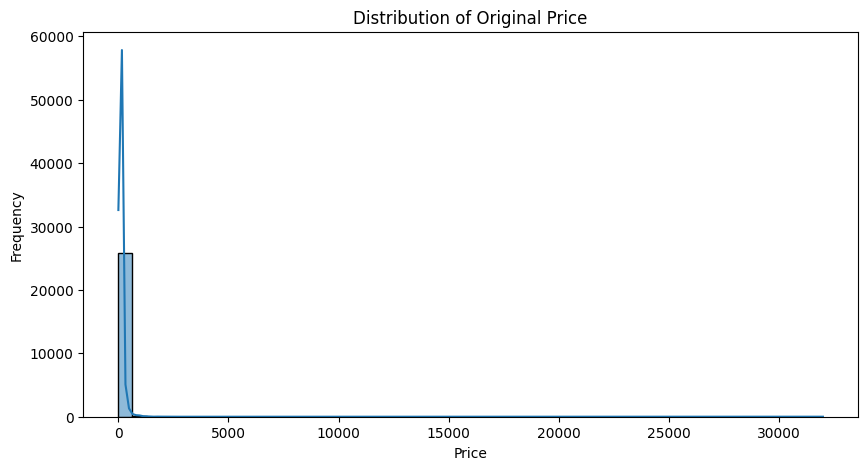

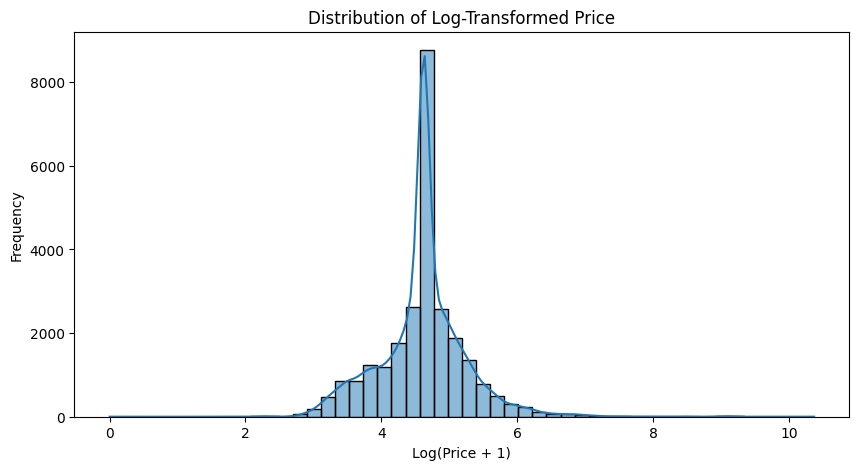

In [2]:
# Plot histogram of original 'price' column
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Original Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Apply log transformation to 'price' column
# Add 1 to avoid log(0) if there are 0 prices
df['price_log'] = np.log1p(df['price'])

# Plot histogram of log-transformed 'price' column
plt.figure(figsize=(10, 5))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

### ✍️ Your Response: 🔧
1. I examined the price column from the Airbnb dataset, since it showed a highly skewed distribution with many low values and a few extreme outliers.

2. I applied a log transformation (log(price + 1)). This method reduces the impact of extreme values and makes the distribution more balanced.

3. The log-transformed version spreads out the bulk of listings and reduces the dominance of outliers, making the histogram much easier to interpret. This helps stakeholders better understand typical price ranges and compare listings without being misled by a few extreme values.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply Min-Max scaling to 'price'
scaler_minmax = MinMaxScaler()
df['price_scaled'] = scaler_minmax.fit_transform(df[['price']])

# Apply Z-score normalization to 'minimum_nights'
scaler_zscore = StandardScaler()
df['minimum_nights_zscore'] = scaler_zscore.fit_transform(df[['minimum_nights']])

# Display the first few rows with the new columns
display(df[['price', 'price_scaled', 'minimum_nights', 'minimum_nights_zscore']].head())

,price,price_scaled,minimum_nights,minimum_nights_zscore
0,29.0,0.000906,4,-0.167064
1,101.0,0.003156,5,-0.132965
2,101.0,0.003156,3,-0.201162
3,101.0,0.003156,5,-0.132965
4,64.0,0.002000,1,-0.269359


### ✍️ Your Response: 🔧
1. I scaled the price column using Min-Max scaling to compress its wide range into values between 0 and 1. I also scaled minimum_nights using Z-score normalization, which centers the data around 0 and expresses values in terms of standard deviations from the mean.

2. The scaled values are more useful in situations where we want to compare features fairly or build models. Without scaling, price would dominate due to its very large range, while minimum nights would contribute very little. With scaling, both features can influence models equally, improving fairness and accuracy.

3. Data scientists and pricing analysts at Airbnb would benefit because they can use the scaled values to build models for dynamic pricing, demand forecasting, or guest segmentation.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [4]:
# Group 'number_of_reviews' into 3 bins and label them
df['review_activity_group'] = pd.cut(df['number_of_reviews'],
                                     bins=3,
                                     labels=['Low', 'Medium', 'High'],
                                     include_lowest=True)

# Display the value counts for the new column
display(df['review_activity_group'].value_counts())

,count
review_activity_group,
Low,25652
Medium,334
High,18


### ✍️ Your Response: 🔧
1. I grouped the number_of_reviews column into three categories: “Low,” “Medium,” and “High.”

2. A grouped view is easier to interpret because it simplifies wide-ranging raw numbers into clear categories. Instead of trying to compare listings with 2, 75, or 400 reviews, stakeholders can quickly understand which listings have relatively few, moderate, or many reviews.

3. This would help the marketing team and hosts. Marketers can target “High” review listings for promotions or trust campaigns, while hosts of “Low” review listings can be guided toward strategies for attracting more guests and building credibility.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [5]:
# Create 'cost_per_night' column
# Add a small value to minimum_nights to avoid division by zero, or handle it appropriately
# Here, assuming minimum_nights is always >= 1 based on common sense for Airbnb listings
df['cost_per_night'] = df['price'] / df['minimum_nights']

# Create 'long_term_flag' column (1 if minimum_nights > 30, 0 otherwise)
df['long_term_flag'] = (df['minimum_nights'] > 30).astype(int)

# Display the first few rows with the new columns
display(df[['price', 'minimum_nights', 'cost_per_night', 'long_term_flag']].head())

,price,minimum_nights,cost_per_night,long_term_flag
0,29.0,4,7.250000,0
1,101.0,5,20.200000,0
2,101.0,3,33.666667,0
3,101.0,5,20.200000,0
4,64.0,1,64.000000,0


### ✍️ Your Response: 🔧 🔧
1. I created cost_per_night, which shows the average nightly rate by dividing price by minimum_nights, and long_term_flag, a binary indicator marking whether a listing requires more than 30 nights.

2. These features would be useful for hosts, Airbnb’s pricing/marketing teams, and city partners.

3. Hosts can compare their nightly rate against competitors to stay competitive. Also, Airbnb analysts can identify which listings lean toward long-term rentals for better segmentation.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [6]:
# Apply one-hot encoding to 'room_type'
room_type_encoded = pd.get_dummies(df['room_type'], prefix='room_type')

# Concatenate the new one-hot encoded columns with the original DataFrame
df = pd.concat([df, room_type_encoded], axis=1)

# Display the first few rows with the new columns
display(df[['room_type', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'room_type_Hotel room']].head())

,room_type,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_Hotel room
0,Private room,False,True,False,False
1,Entire home/apt,True,False,False,False
2,Entire home/apt,True,False,False,False
3,Entire home/apt,True,False,False,False
4,Private room,False,True,False,False


### ✍️ Your Response: 🔧
1. I encoded the room_type column because it’s an important categorical feature that affects booking behavior, but it cannot be used directly in numerical models.

2. I used one-hot encoding, which creates a new binary column for each room type (Entire home/apt, Private room, Shared room, Hotel room). This method works best since the categories are nominal and don’t have a natural order.

3. This transformation allows models to include room type as a predictive feature without bias. For example, a pricing model can learn if entire homes generally command higher rates than private rooms, dashboards can show average prices by room type, and business reports can highlight trends across different property types.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The most important step was the log transformation of price. It took a column that was extremely skewed and made it more balanced, which not only improved visualizations but also made the data more reliable for modeling. It was interesting to see how a single transformation could reveal clearer patterns in the majority of listings that were previously hidden by extreme outliers.

2. The cost_per_night feature would be most useful for hosts, because it gives a realistic way to compare their nightly competitiveness with other listings. For analysts, the scaled price and minimum nights are valuable since they put features on equal footing for predictive models. For city planners, the long_term_flag is crucial because it highlights which properties may be functioning more like rentals than short-term stays, which can influence policy decisions.

3. I would build a dashboard that highlights price competitiveness and review activity by neighborhood. This could include average cost per night, booking trends by room type, and review activity grouped into Low/Medium/High.

4. This assignment directly supports my customized learning outcomes by practicing data preparation for strategic analytics and operational decision-making. Transforming Airbnb data into scaled, grouped, and encoded features mirrors the real-world need to clean and structure messy data before it can guide decisions. Just like in my outcome of supply chain risk analytics and operational resilience, these transformations ensure models and dashboards are reliable, interpretable, and ready to support business and policy choices.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [7]:
!jupyter nbconvert --to html "assignment_07_data_AlhinaiAlmuhanna.ipynb"

[NbConvertApp] Converting notebook assignment_07_data_AlhinaiAlmuhanna.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 408681 bytes to assignment_07_data_AlhinaiAlmuhanna.html
